In [216]:
import scipy
import pandas as pd

salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')

print(salary)

    Experience Years  Salary
0                1.1   39343
1                1.2   42774
2                1.3   46205
3                1.5   37731
4                2.0   43525
5                2.2   39891
6                2.5   48266
7                2.9   56642
8                3.0   60150
9                3.2   54445
10               3.2   64445
11               3.5   60000
12               3.7   57189
13               3.8   60200
14               3.9   63218
15               4.0   55794
16               4.0   56957
17               4.1   57081
18               4.3   59095
19               4.5   61111
20               4.7   64500
21               4.9   67938
22               5.1   66029
23               5.3   83088
24               5.5   82200
25               5.9   81363
26               6.0   93940
27               6.2   91000
28               6.5   90000
29               6.8   91738
30               7.1   98273
31               7.9  101302
32               8.2  113812
33            

In [217]:
X = salary['Experience Years']
y = salary['Salary']

Text(0, 0.5, 'Salary')

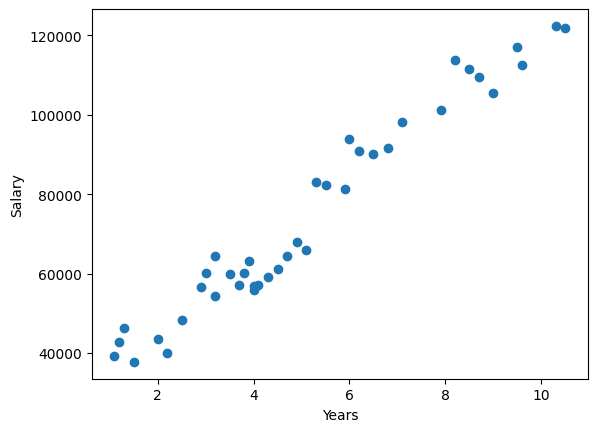

In [60]:
import matplotlib.pyplot as mlt
mlt.scatter(X , y)
mlt.xlabel('Years')
mlt.ylabel('Salary')

In [80]:
#Train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7,random_state=2529)

In [81]:
X_train = X_train.values.reshape(-1,1)

In [82]:
y_train = y_train.values.reshape(-1,1)

In [83]:
X_train.shape[0]

28

In [84]:
#fitting the algorithm
from sklearn.linear_model import LinearRegression

lp = LinearRegression()

lp.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
X_test , y_test

(29     6.8
 11     3.5
 33     8.5
 16     4.0
 19     4.5
 38    10.3
 27     6.2
 14     3.9
 17     4.1
 12     3.7
 1      1.2
 6      2.5
 Name: Experience Years, dtype: float64,
 29     91738
 11     60000
 33    111620
 16     56957
 19     61111
 38    122391
 27     91000
 14     63218
 17     57081
 12     57189
 1      42774
 6      48266
 Name: Salary, dtype: int64)

In [51]:
lp.predict(X_test.iloc[10].reshape(-1,1))

array([[37883.70126987]])

In [53]:
#Using Mannual Method of Simple Linear Regression

In [121]:
import numpy as np

class LinearRegressionManual:
    def __init__(self , m=None , b=None):
        self.m = m
        self.b = b

    def fit(self , X_train , y_train):
        
        nm = np.sum([(X_train.iloc[i] - X_train.mean())*(y_train.iloc[i] - y_train.mean()) for i in range(X_train.shape[0])])
        dm = np.sum([(X_train.iloc[i] - X_train.mean())*(X_train.iloc[i] - X_train.mean()) for i in range(X_train.shape[0])])

        self.m = nm / dm
        self.b = y_train.mean() - (self.m * X_train.mean())

        return self.m , self.b

    def predict(self , X_test):
        return self.m * X_test + self.b

In [122]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7,random_state=2529)

In [123]:
X_train.iloc[0]

6.5

In [124]:
lR = LinearRegressionManual()

lR.fit(X_train , y_train)

(9405.616632335532, 26596.961311068233)

In [125]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

lp.fit(X_train , y_train)

lp.coef_ , lp.intercept_

(array([[9405.61663234]]), array([26596.96131107]))

In [139]:
print('Manual Result:' , lR.predict(X_test[0]))

X_test = X_test.reshape(-1,1)

# For scikit-learn:
single_sample = X_test[0].reshape(1, -1) # Shape (1, 1)
print('Sklearn Result:', lp.predict(single_sample))

Manual Result: [90555.15441095]
Sklearn Result: [[90555.15441095]]


In [ ]:
#Manual way to calculate Best Fit line usingGradient Descent

Text(0, 0.5, 'Salary')

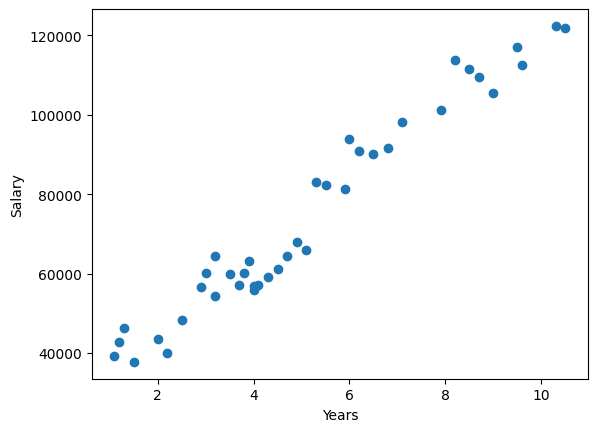

In [143]:
#Data
import matplotlib.pyplot as mlt
mlt.scatter(X , y)
mlt.xlabel('Years')
mlt.ylabel('Salary')

In [218]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y)

In [224]:
X_train = X_train.values.reshape(-1,1)
X_train.shape

(30, 1)

In [287]:
#Using the OLS
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = np.array(X_train).reshape(-1,1) 
y_train = np.array(y_train).reshape(-1,1) 
X_test =np.array(X_test).reshape(-1,1) 

lR = LinearRegression()

lR.fit(X_train , y_train)

lR.predict(X_test)
print(lR.coef_ , lR.intercept_)

[[9717.54435333]] [24758.73799107]


In [288]:
y_test

7      56642
35    105582
11     60000
36    116969
30     98273
25     81363
31    101302
14     63218
39    121872
6      48266
Name: Salary, dtype: int64

In [332]:
class GradientDescent:
    def __init__(self , m =1 , b=0 , epoch=1000 ,meu=0.01):
        self.m = m
        self.b = b
        self.meu = meu
        self.epoch = epoch

    def fit(self , X_train , y_train):
        X_train = np.array(X_train).reshape(-1) 
        y_train = np.array(y_train).reshape(-1)   
        
        for i in range(self.epoch):
            b_slope = -2*np.mean((y_train - self.m * X_train - self.b))
            m_slope = -2*np.mean(((y_train -self.m * X_train - self.b)*X_train))
            
            self.b = self.b - (self.meu*b_slope)
            self.m = self.m - (self.meu*m_slope)

        return self.b , self.m

    def predict(self , X_test):
        return self.m * X_test + self.b

In [333]:
X_train.shape

(30, 1)

In [334]:
gD = GradientDescent()

gD.fit(X_train,y_train)

(24382.285833305497, 9780.222586840897)

In [315]:
y_test

7      56642
35    105582
11     60000
36    116969
30     98273
25     81363
31    101302
14     63218
39    121872
6      48266
Name: Salary, dtype: int64